# Logistic Regression in NumPy

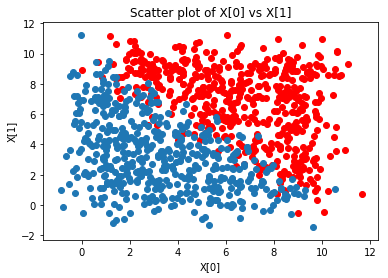

Traning Size:  800
Testing Size:  200


In [12]:
#Lets implement logistic regression in NumPy
import numpy as np
from matplotlib import pyplot as plt
#Lets create our own dataset
N=1000
X=np.random.rand(N,2)*10
Y=(X[:,0]+X[:,1]>10).astype('int')
#Real world data is not perfect lets add some gussian noise
X=X+np.random.randn(N,2)*0.6
#Lets have a loot at our data
plt.scatter(X[:,0][Y==1],X[:,1][Y==1],color='red')
plt.scatter(X[:,0][Y==0],X[:,1][Y==0])
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.title('Scatter plot of X[0] vs X[1]')
plt.show()
#Lets divide the data 
#Here we do not have any hyperparameter so lets divide the data into tranning and testing with proportion 0.8 and 0.2
X_train=X[0:int(N*0.8),:]
Y_train=Y[0:int(N*0.8)]
X_test=X[int(N*0.8):,:]
Y_test=Y[int(N*0.8):]
print('Traning Size: ',X_train.shape[0])
print('Testing Size: ',X_test.shape[0])

In [13]:
class Logistic_Regression:
    #Constructor
    def __init__(self):
        self.W=None
        
    @staticmethod    
    def sigmoid(X):
        return 1/(1+np.exp(-X))
    
    @staticmethod
    def binary_cross_entropy(Y,Y_pred):
         # 1e-13 is added for numerical stability
        return np.sum(-(Y*np.log(Y_pred+1e-13)+(1-Y)*np.log((1-Y_pred)+1e-13)))/len(Y)
    
    def predict(self,X):
        return Logistic_Regression.sigmoid(X[:,0]*self.W[0]+X[:,1]*self.W[1]+self.W[2])
    
    
    #lets define gradient functon for binary_cross_entropy
    def bce_gradient(self,X,Y):
        pred_Y=self.predict(X)
        grad_w1=np.sum((pred_Y-Y)*X[:,0])/len(Y)
        grad_w2=np.sum((pred_Y-Y)*X[:,1])/len(Y)
        grad_w3=np.sum((pred_Y-Y))/len(Y)
        return np.array([grad_w1,grad_w2,grad_w3])
    

    #return list of mini_batches
    @staticmethod
    def mini_batches(X,Y,size):
        if size>=len(X):
            return [(X,Y)]
        else:
            mini_batches=[]
            for i in range(int(len(X)/size)):
                mini_batches.append((X[i*size:(i+1)*size,:],Y[i*size:(i+1)*size]))
            if len(X)%size!=0:
                mini_batches.append((X[(i+1)*size:,:],Y[(i+1)*size:]))
            return mini_batches
    
    
    #function that trains the model
    def train(self,X_train,Y_train,n_epoch=10,mini_batch_size=64,learning_rate=0.000001):
        self.W=np.random.randn(3)
        for i in range(n_epoch):
            print('Epoch number: ',i+1)
            for X,Y in Logistic_Regression.mini_batches(X_train,Y_train,mini_batch_size):
                self.W=self.W-learning_rate*self.bce_gradient(X,Y)
            print('Cost: ',Logistic_Regression.binary_cross_entropy(Y_train,self.predict(X_train)))

In [14]:
logi_r=Logistic_Regression()

In [15]:
logi_r.train(X,Y,n_epoch=200,mini_batch_size=32,learning_rate=0.3)

Epoch number:  1
Cost:  1.1274035395431388
Epoch number:  2
Cost:  2.8686055369621046
Epoch number:  3
Cost:  0.9654140220226614
Epoch number:  4
Cost:  0.7816101258377446
Epoch number:  5
Cost:  0.7052038516801656
Epoch number:  6
Cost:  0.6974678195777019
Epoch number:  7
Cost:  0.4537655410297557
Epoch number:  8
Cost:  0.33759752119997805
Epoch number:  9
Cost:  0.3036579259521956
Epoch number:  10
Cost:  0.2855742736428445
Epoch number:  11
Cost:  0.27129841212307904
Epoch number:  12
Cost:  0.259220571716668
Epoch number:  13
Cost:  0.24909639665162275
Epoch number:  14
Cost:  0.24068820022547602
Epoch number:  15
Cost:  0.233709569965097
Epoch number:  16
Cost:  0.22788852775930962
Epoch number:  17
Cost:  0.22299586271769076
Epoch number:  18
Cost:  0.2188480696652959
Epoch number:  19
Cost:  0.21530102653668
Epoch number:  20
Cost:  0.21224200216865996
Epoch number:  21
Cost:  0.20958256122854182
Epoch number:  22
Cost:  0.20725291063886117
Epoch number:  23
Cost:  0.205197571

Binary Cross-Entropy in test set:  0.1464845429379069


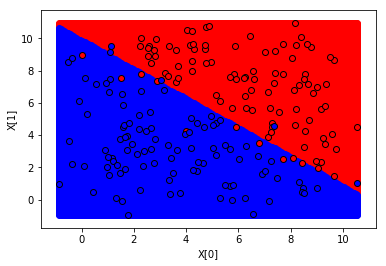

In [16]:
#lets see how it did in test set
Y_test_pre=logi_r.predict(X_test)
print('Binary Cross-Entropy in test set: ',Logistic_Regression.binary_cross_entropy(Y_test,Y_test_pre))
#lets plot the graph
n = 200
X0_space = np.linspace(np.min(X_test[:,0]),np.max(X_test[:,0]),n)
X1_space = np.linspace(np.min(X_test[:,1]),np.max(X_test[:,1]),n)
X0_co,X1_co = np.meshgrid(X0_space,X1_space)
X0_co=X0_co.reshape(-1,1)
X1_co=X1_co.reshape(-1,1)
grid_co=np.concatenate((X0_co,X1_co),axis=1)
grid_pred=logi_r.predict(grid_co)
plt.scatter(grid_co[:,0][grid_pred>0.5],grid_co[:,1][grid_pred>0.5],color='red')
plt.scatter(grid_co[:,0][grid_pred<0.5],grid_co[:,1][grid_pred<0.5],color='blue')
plt.scatter(X_test[:,0][Y_test==1],X_test[:,1][Y_test==1],color='red',edgecolor='black')
plt.scatter(X_test[:,0][Y_test==0],X_test[:,1][Y_test==0],color='blue',edgecolor='black')
plt.xlabel('X[0]')
plt.ylabel('X[1]')
plt.show()

In [17]:
#lets see the final parameters
logi_r.W

array([  1.43705767,   1.58957013, -15.69507103])